In [1]:
data_type = 'red_data' # reduced data

In [2]:
n_bins = 15

# Reweighting MC sample of $B \to D^{*-}\left(D^{+} \to K^- \pi^+ \pi^+  \right)X$ Background

**INPUTS**
- `MC`: $B\to D^{*-} (D^+ \to K^- \pi^+ \pi^-) (X)$
- `data`: LHCb data, with $_s$Weights to project in the $D^+ \to K^- \pi^+ \pi^-$ contribution and project out the other contributions.

**GOALS**
1. to learn the weights to apply to MC to align MC to data for the $D^+ \to K^- \pi^+ \pi^- $ decays by looking at the MC and $_s$Weighted LHCb data 
2. to apply the weights to the general MC.

We hope that this will reweight the general very inclusive MC sample for $B \to D^{*-} D^+ (X)$

## Theory - reweighting the MC data

Instead of using the `GBReweighter`, we'll use another technic.

1. Histogram MC and sWeighted data in a variable X
2. Make $\frac{\text{MC}}{\text{data}}$ ratio
3. Fit this with a cubic ($k=3$) spline (`scipy.interpolate.splrep`)
4. Assign weights to each MC event based on the value of X for that event
5. Move onto next variable Y, assigning the weights for variable X to the MC
6. Update the weights by multiplying the $w_X$ by the $w_Y$, the weights are updated to be the product of all previous ones

In [3]:
import sys
sys.path.insert(0, '../..')
from definition import (
    data_names,
    limits_m_Kpipi,
    columns,
    column_ranges
)

MC_name   = data_names['MC']
data_name = data_names[data_type]

low_m_Kpipi = limits_m_Kpipi[data_type]['low']
high_m_Kpipi = limits_m_Kpipi[data_type]['high']

print("MC name: ", MC_name)
print("data name: ", data_name)

print('----')
print('m_Kpipi')
print("low: ", low_m_Kpipi)
print("high: ", high_m_Kpipi)
print('----')
print("Range of the columns")
print(column_ranges)

MC name:  BTODstDX_MC
data name:  BTODstDX_reduced
weight MC name:  BTODstDX_MC_weights
----
m_Kpipi
low:  1820
high:  1950
----
Range of the columns
{'q2_reco': [None, None], 'isolation_bdt': [None, None], 'tau_life_reco': [None, None], 'B0_M': [None, 5000], 'm_DstKpipi': [None, None]}


In [4]:
weight_MC_name = f"bins_reweight_{MC_name}_to_{data_name}"

The columns that need to be looked at are:
- $q^2$: `q2_reco`
- *isolation BDT*: `isolation_bdt`
- $t_\tau$: `tau_life_reco`
- $m(D^*K\pi\pi)$: `m_DstKpipi`
- The angles 
    - $\theta_X$ ($=\theta_D$ of the paper?): `theta_X_reco`
    - $\theta_L$: `theta_L_reco`
    - $\chi$: `chi_reco`

In [5]:
# python libraries
import numpy as np

# bd2dsttaunu
from bd2dsttaunu.locations import loc

# HEA library
from HEA import load_dataframe
from HEA.pandas_root import load_saved_root

from HEA.reweighting import BinReweighter

Welcome to JupyROOT 6.22/06


## Read the dataframe

In [6]:
df = {}
df['MC'] = load_dataframe(loc.B2DstDplusX_MC, tree_name='DecayTreeTuple/DecayTree', 
                          columns=columns+['m_Kpipi']+['theta_L_reco', 'theta_X_reco'])
df['data'] = load_saved_root(data_name + '_with_sWeights', 
                             folder_name=data_name)

Loading /data/lhcb/users/scantlebury-smead/angular_analysis/double_charm/final_ds_selection_B_DstDpX_Kpipi_truth_matched.root
Loading /home/correiaa/bd2dsttaunu/output//root/BTODstDX_reduced/BTODstDX_reduced_with_sWeights.root


In [7]:
df['MC'] = df['MC'].query(f'm_Kpipi > {low_m_Kpipi} and m_Kpipi < {high_m_Kpipi}')
# df['data'] = df['data'].query(f'm_Kpipi > {low_m_Kpipi} and m_Kpipi < {high_m_Kpipi}')

Drop NaN values

In [8]:
df['data'] = df['data'].dropna()
df['MC'] = df['MC'].dropna()

Check for NaN values

In [9]:
# for column in columns+['theta_L_reco', 'theta_X_reco']:
#     print(column)
#     print('data')
#     print(df['data'][column].isnull().values.any())
#     print('MC')
#     print(df['MC'][column].isnull().values.any())
#     print("")

## Prepare the dataframes

Pick up the variables

In [10]:
print(f"{len(columns)} available columns:")
for column in columns:
    print("- " + column)

13 available columns:
- m_Kpipi
- q2_reco
- isolation_bdt
- tau_life_reco
- m_DstKpipi
- theta_X_reco
- theta_L_reco
- chi_reco
- costheta_X_reco
- costheta_L_reco
- coschi_reco
- tau_M
- B0_M


## Apply weights

In [12]:
spline_columns = [
    'q2_reco',
    'isolation_bdt',
    'costheta_X_reco',    
    'chi_reco',
    'costheta_L_reco',
]

In [13]:
binReweighter = BinReweighter(
    data=df['data'].drop('sWeight', 1),
    MC=df['MC'],
    n_bins=n_bins,
    name=weight_MC_name,
    data_weights=df['data']['sWeight'],
#     column_ranges=column_ranges
)

q2_reco
No reweighting available for MC


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/q2_reco_MC_data
No reweighting available for MC
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced_d_data/q2_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/q2_reco_MC_Reweighted_MC_data
isolation_bdt
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/isolation_bdt_MC_Reweighted_MC_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced_d_data/isolation_bdt
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/isolation_bdt_MC_Reweighted_MC_data
costheta_X_reco
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/costheta_X_reco_MC_Reweighted_MC_data
Figure saved in /home/cor

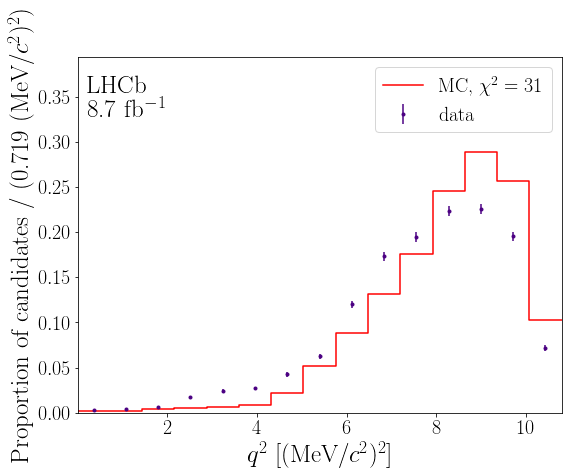

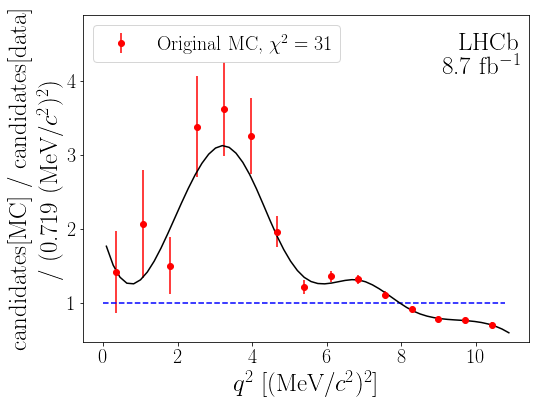

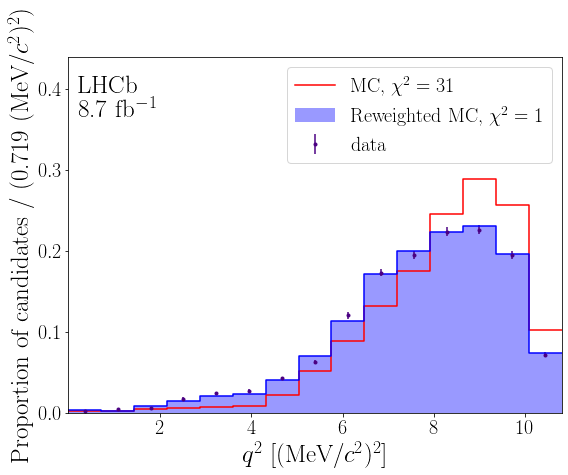

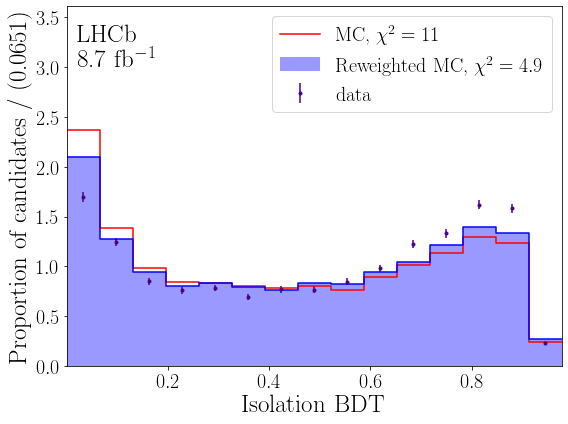

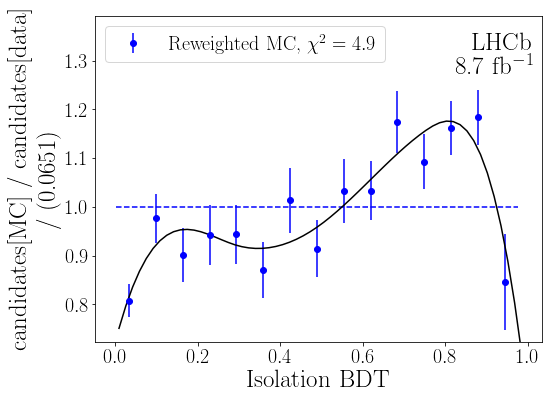

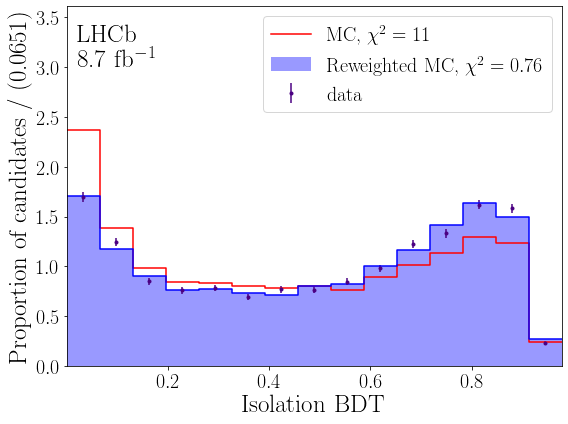

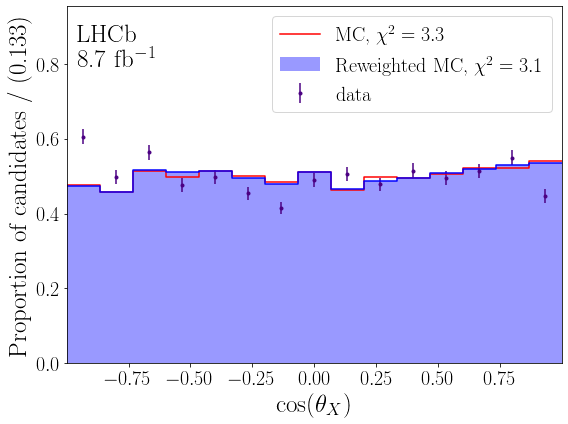

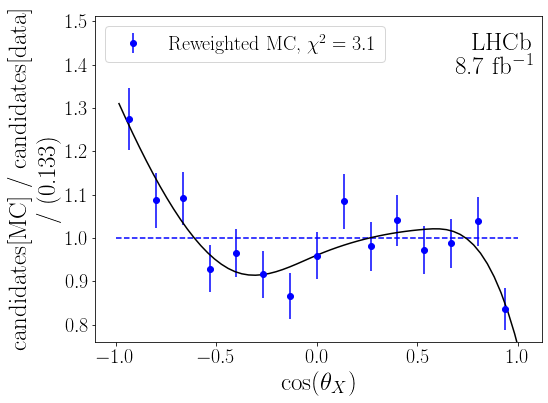

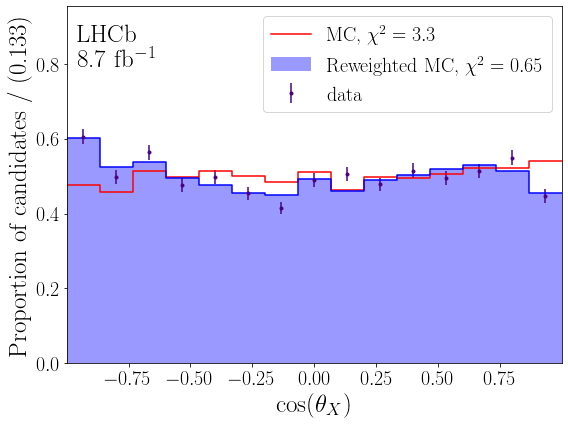

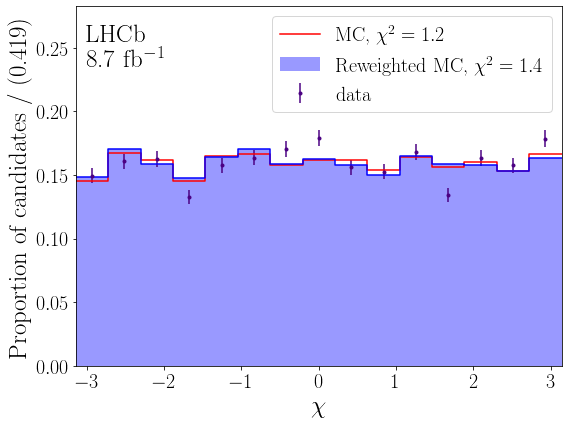

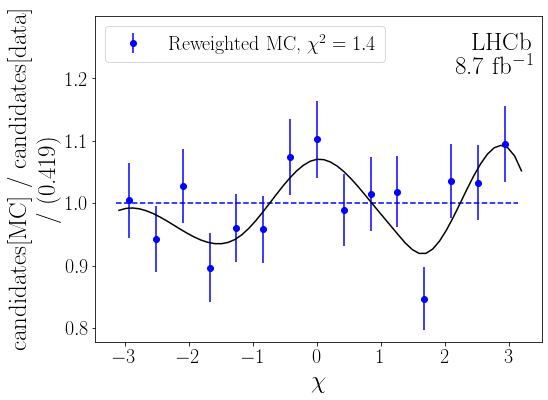

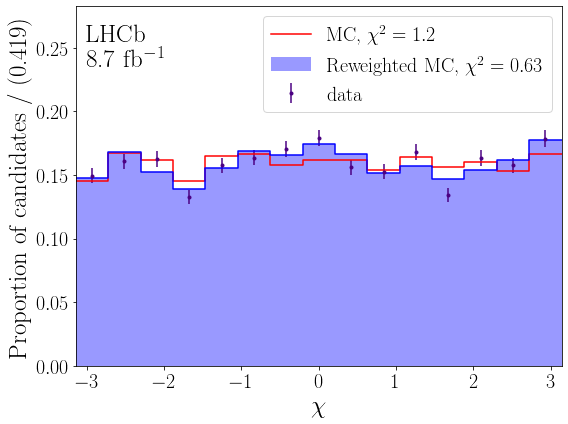

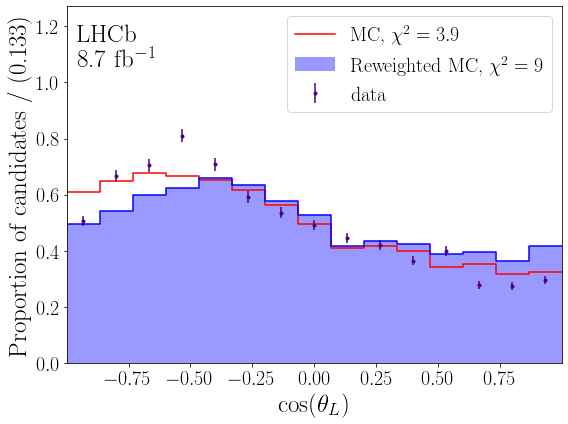

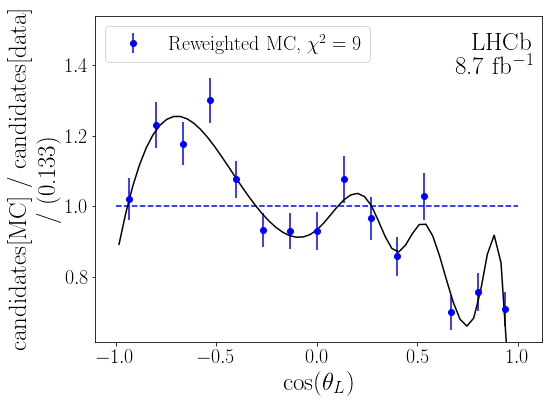

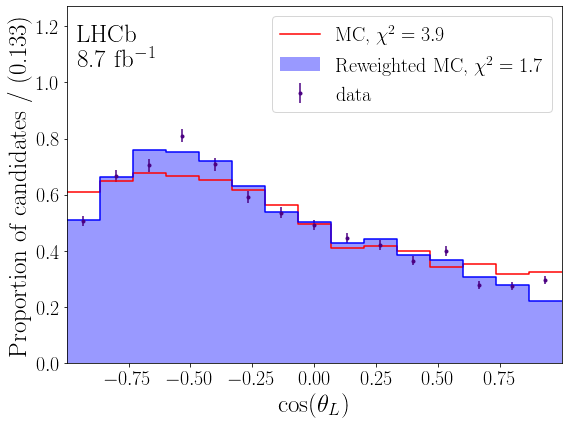

In [14]:
for column in spline_columns:
    print(column)
    binReweighter.plot_hist(column, plot_original=True, plot_reweighted=True)
    binReweighter.fit_spline(column)
    binReweighter.plot_ratio(column, plot_original=False, plot_reweighted=True)
    binReweighter.apply_new_MC_weights(column)
    binReweighter.plot_hist(column)

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/q2_reco_MC_Reweighted_MC_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/isolation_bdt_MC_Reweighted_MC_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/costheta_X_reco_MC_Reweighted_MC_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/chi_reco_MC_Reweighted_MC_data
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/costheta_L_reco_MC_Reweighted_MC_data


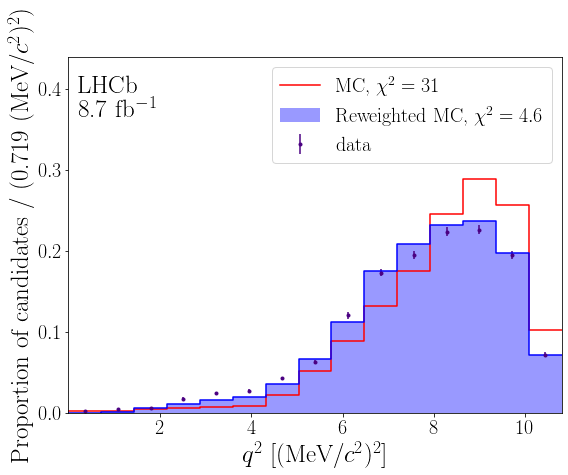

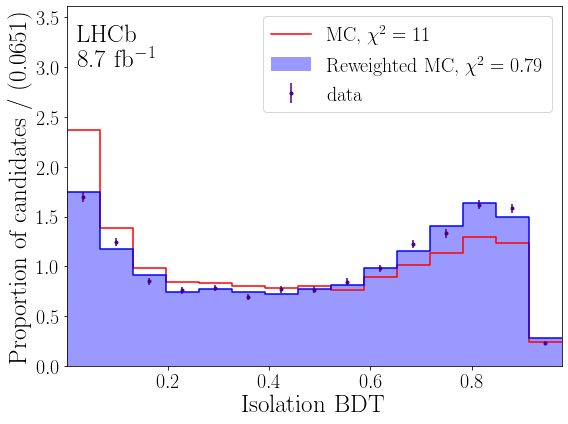

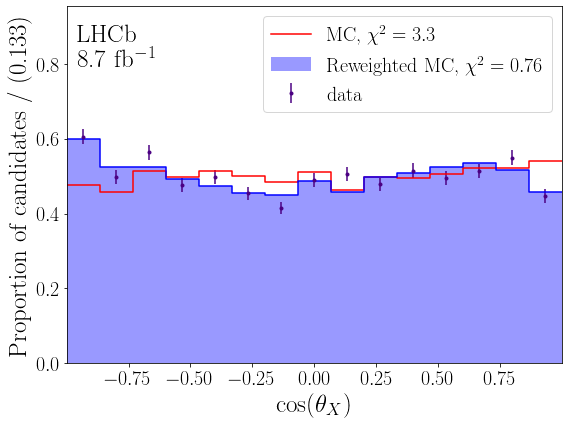

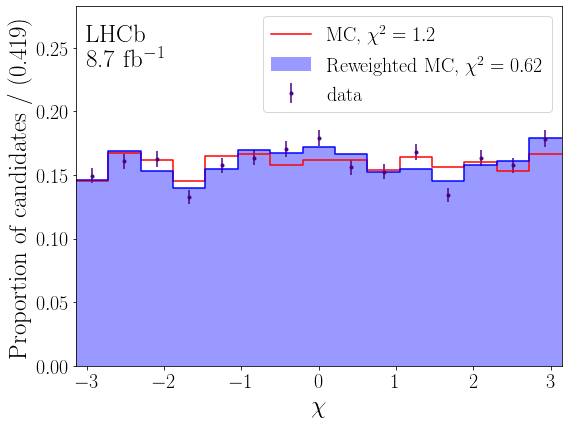

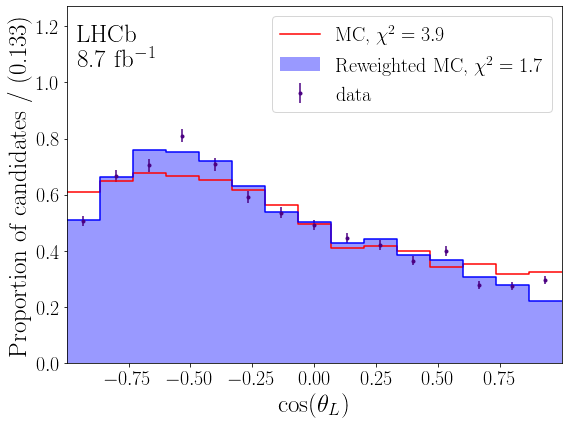

In [15]:
for column in spline_columns:
    binReweighter.plot_hist(column)

In [16]:
binReweighter.trained_columns

['q2_reco', 'isolation_bdt', 'costheta_X_reco', 'chi_reco', 'costheta_L_reco']

In [17]:
binReweighter.save_tcks()

Pickle file saved in /home/correiaa/bd2dsttaunu/output/pickle/bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/q2_reco_reweight_tck.pickle
Pickle file saved in /home/correiaa/bd2dsttaunu/output/pickle/bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/tck_reweight_tck_columns.pickle
Pickle file saved in /home/correiaa/bd2dsttaunu/output/pickle/bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/isolation_bdt_reweight_tck.pickle
Pickle file saved in /home/correiaa/bd2dsttaunu/output/pickle/bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/tck_reweight_tck_columns.pickle
Pickle file saved in /home/correiaa/bd2dsttaunu/output/pickle/bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/costheta_X_reco_reweight_tck.pickle
Pickle file saved in /home/correiaa/bd2dsttaunu/output/pickle/bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/tck_reweight_tck_columns.pickle
Pickle file saved in /home/correiaa/bd2dsttaunu/output/pickle/bins_reweight_BTODstDX_MC_to_BTODstDX_reduced/chi_reco_reweight_tck.pickle
Pickle file saved in 